### IMPORTAÇÃO

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = r"C:\Users\Graziela Santana\Desktop\TCC\Solubilidade\TCC_Solubilidade.xlsx"
df = pd.read_excel(path, sheet_name = 'Dados')

### ANÁLISE DA ESTRUTURA DOS DADOS

In [3]:
df.head()

,Temp,Press,Mol,CO2
0,323.2,5.0,0.0,1.473
1,323.2,10.0,0.0,2.137
2,323.2,15.0,0.0,2.206
3,323.2,20.0,0.0,2.285
4,323.2,30.0,0.0,2.492


In [4]:
df.info()
# sem necessidade de preenchimento de missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    978 non-null    float64
 1   Press   978 non-null    float64
 2   Mol     978 non-null    float64
 3   CO2     978 non-null    float64
dtypes: float64(4)
memory usage: 30.7 KB


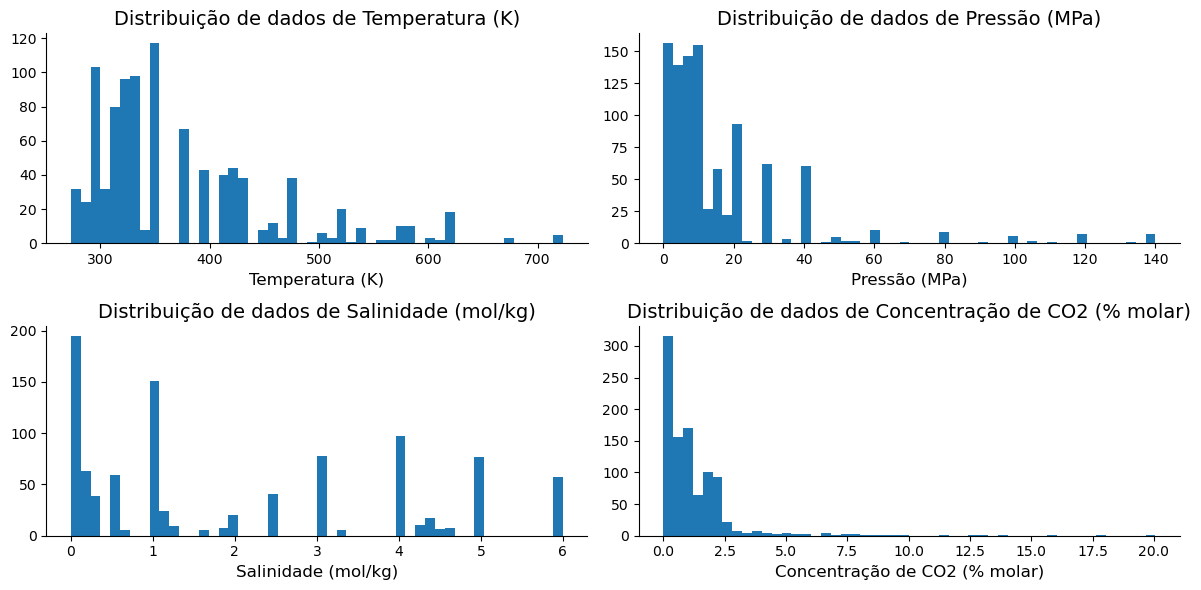

In [5]:
import matplotlib.pyplot as plt

variaveis = ["Temperatura (K)", "Pressão (MPa)", "Salinidade (mol/kg)", "Concentração de CO2 (% molar)"]
dados = [df["Temp"], df["Press"], df["Mol"], df["CO2"]]

plt.figure(figsize=(12, 6))

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    plt.hist(dados[i], bins=50)
    plt.xlabel(variaveis[i], fontsize=12)
    plt.ylabel("")
    plt.title(f"Distribuição de dados de {variaveis[i]}", fontsize=14)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.tight_layout()
plt.savefig(r'C:\Users\Graziela Santana\Desktop\TCC\Solubilidade\Histogramas.png')
plt.show()

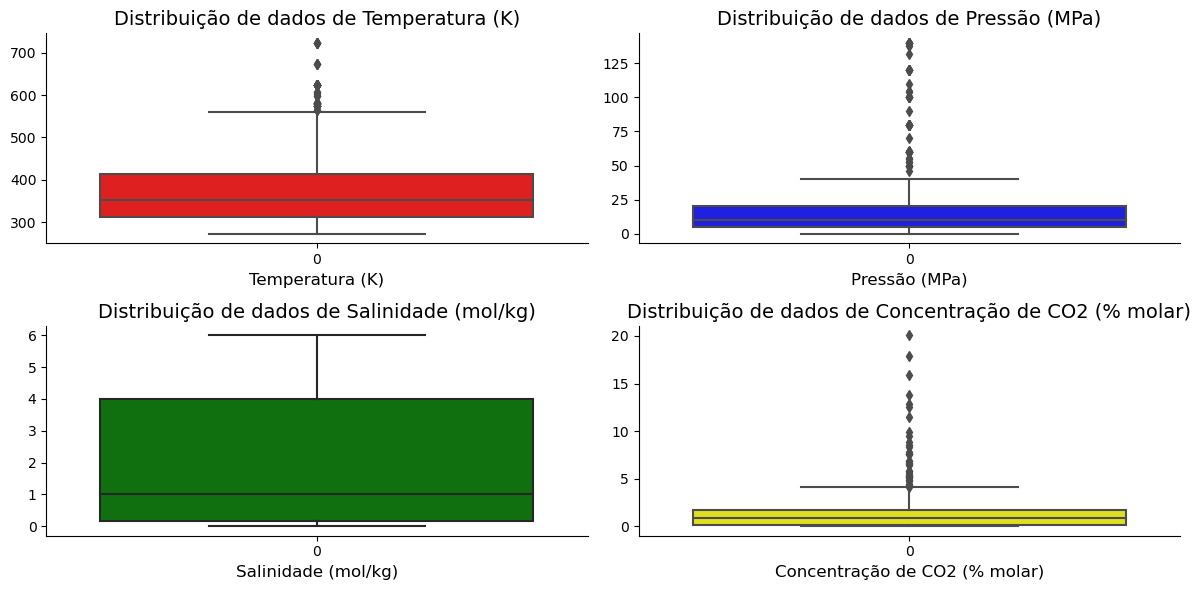

In [14]:
import seaborn as sns

variaveis = ["Temperatura (K)", "Pressão (MPa)", "Salinidade (mol/kg)", "Concentração de CO2 (% molar)"]
dados = [df["Temp"], df["Press"], df["Mol"], df["CO2"]]
cor = ['red','blue','green','yellow']

plt.figure(figsize=(12, 6))

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    sns.boxplot(data = dados[i], color = cor[i])
    plt.xlabel(variaveis[i], fontsize=12)
    plt.ylabel("")
    plt.title(f"Distribuição de dados de {variaveis[i]}", fontsize=14)
    
    sns.despine()
    
plt.tight_layout()
plt.savefig(r'C:\Users\Graziela Santana\Desktop\TCC\Solubilidade\Boxplots.png')
plt.show()

### DIVISÃO DOS DADOS

In [6]:
# criação de coluna para classificar as faixas operacionais de acordo com as ideais para projetos de ccs
def ccs(df):
    if df['Temp'] < 373 and 20 <= df['Press'] <= 40:
        return 0
    else:
        return 1

df['ccs'] = df.apply(ccs, axis=1)
df['ccs'].value_counts()

1    860
0    118
Name: ccs, dtype: int64

In [7]:
# divisão dos dados em treino e teste
# estratificação dos dados para que hajam dados nas faixas do ccs no conjunto de treino e teste 
from sklearn.model_selection import train_test_split

previsores = df.iloc[:,0:3];
alvo = df.iloc[:,3];
strat = df.iloc[:,4];

x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, alvo, test_size = 0.2, random_state = 0,stratify=strat)

### ANÁLISE EXPLORATÓRIA

In [8]:
#unindo os previsores e alvos de treino para realizar a análise exploratória
treino = x_treino.copy()
treino['CO2'] = y_treino

In [9]:
treino.describe()

,Temp,Press,Mol,CO2
count,782.000000,782.000000,782.000000,782.000000
mean,374.586509,16.525894,1.965345,1.234900
std,84.717756,22.015895,1.945289,1.811411
min,273.150000,0.006630,0.000000,0.000000
25%,313.380000,4.577399,0.172844,0.109750
50%,353.070000,10.000000,1.000000,0.845000
75%,420.662500,20.000000,3.999250,1.703500
max,723.150000,140.000000,6.000000,20.059560


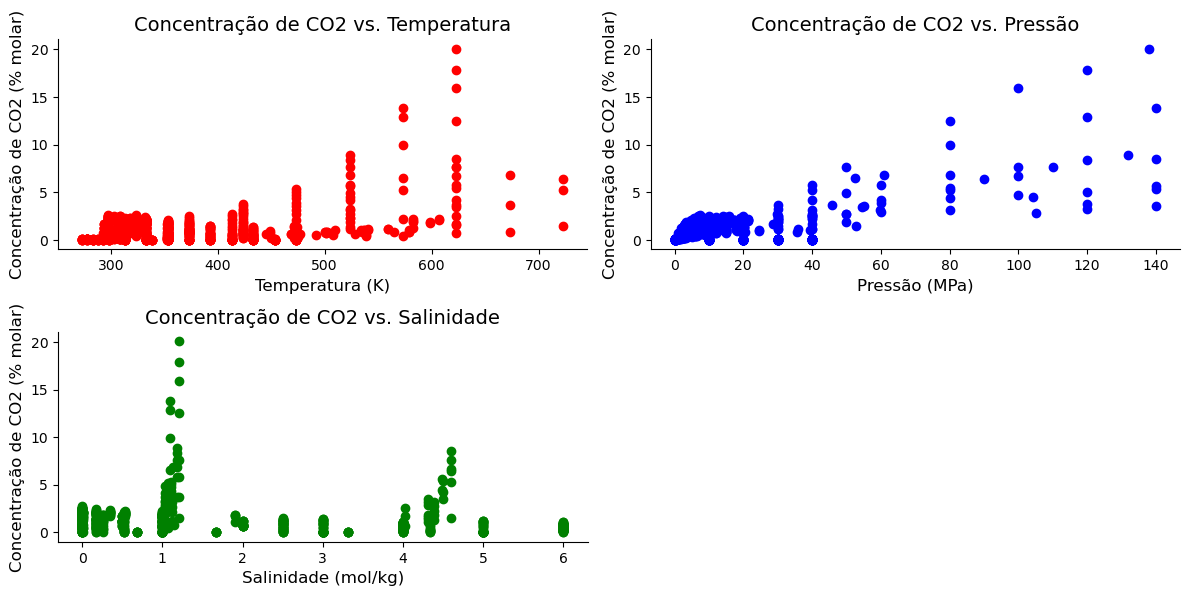

In [10]:
# verificar relação da variável alvo com os variáveis independentes
# não será avaliada a relação entre as variáveis independentes porque são pontos experimentais cujas faixas foram setadas

plt.figure(figsize=(12, 6))

# temperatura
plt.subplot(2, 2, 1)
plt.scatter(treino['Temp'], treino['CO2'], c='red')
plt.xlabel("Temperatura (K)", fontsize=12)
plt.ylabel("Concentração de CO2 (% molar)", fontsize=12)
plt.title("Concentração de CO2 vs. Temperatura", fontsize=14)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# pressão
plt.subplot(2, 2, 2)
plt.scatter(treino['Press'], treino['CO2'], c='blue')
plt.xlabel("Pressão (MPa)", fontsize=12)
plt.ylabel("Concentração de CO2 (% molar)", fontsize=12)
plt.title("Concentração de CO2 vs. Pressão", fontsize=14)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# salinidade
plt.subplot(2, 2, 3)
plt.scatter(treino['Mol'], treino['CO2'], c='green')
plt.xlabel("Salinidade (mol/kg)", fontsize=12)
plt.ylabel("Concentração de CO2 (% molar)", fontsize=12)
plt.title("Concentração de CO2 vs. Salinidade", fontsize=14)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(r'C:\Users\Graziela Santana\Desktop\TCC\Solubilidade\Relações.png')
plt.show()

In [11]:
# verificação da normalidade

import scipy.stats as stats

estatistica, p = stats.shapiro(treino.CO2)

if p>0.05:
    print('A distribuição é normal')
else:
    print('A distribuição não é normal')

A distribuição não é normal


In [12]:
# como a distribuição não é normal, utiliza-se o método de Spearman
treino.corr(method="spearman")

,Temp,Press,Mol,CO2
Temp,1.000000,0.189815,0.048086,0.105118
Press,0.189815,1.000000,0.191380,0.295862
Mol,0.048086,0.191380,1.000000,-0.403573
CO2,0.105118,0.295862,-0.403573,1.000000


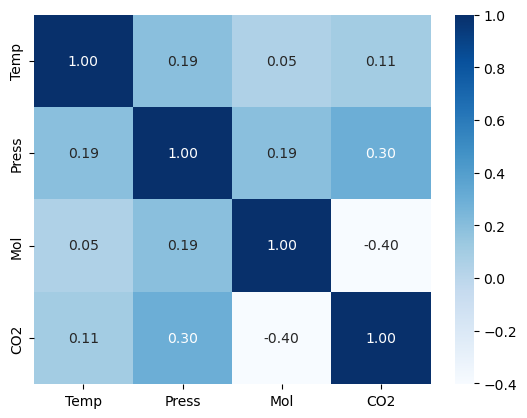

In [15]:
import matplotlib.pyplot as plt

sns.heatmap(treino.corr(method="spearman"),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.show()

In [16]:
# analisar a dispersão dos dados conforme grupos estabelecidos

faixas = [0, 367, 456, 545, 800]  # Faixas de temperatura
rotulos = ['Abaixo de 367 K', 'Entre 367 e 456 K', 'Entre 456 e 545 K', 'Acima de 545 K']

treino['Grupo'] = pd.cut(df['Temp'], bins=faixas, labels=rotulos)

<AxesSubplot:xlabel='Grupo', ylabel='CO2'>

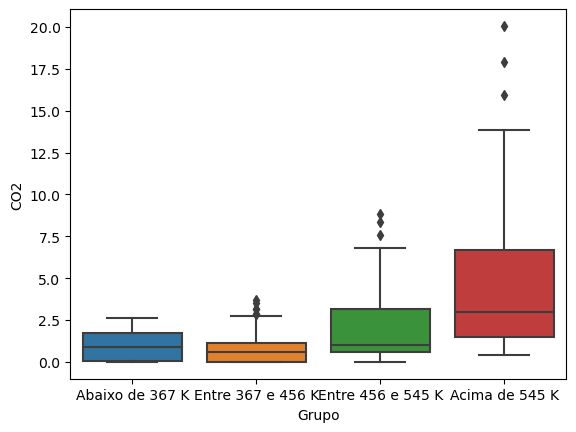

In [17]:
# análise da variação da solubilidade de acordo com as faixas de temperatura
import seaborn as sns

sns.boxplot(x='Grupo', y='CO2', data=treino)

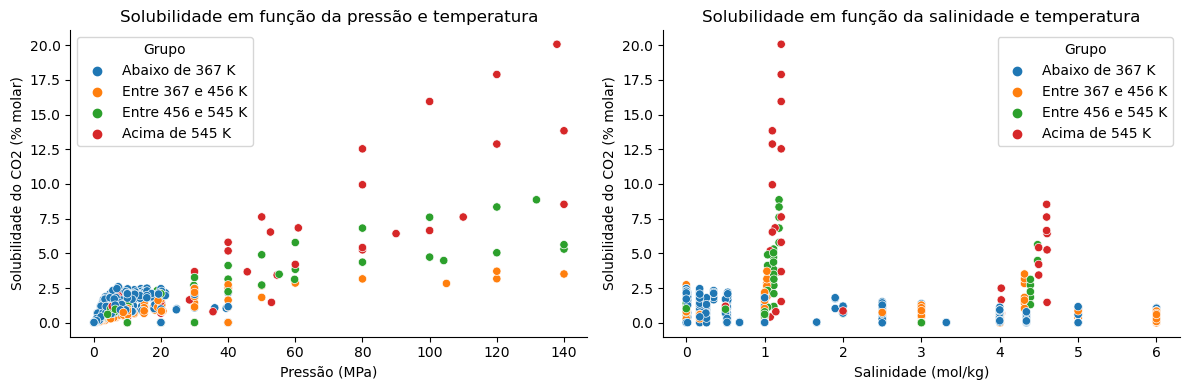

In [18]:
# análise simultânea da influência da temperatura e da pressão

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(data=treino,x='Press',y='CO2',hue='Grupo')
plt.xlabel('Pressão (MPa)', fontsize=10)
plt.ylabel("Solubilidade do CO2 (% molar)")
plt.title("Solubilidade em função da pressão e temperatura", fontsize=12)
sns.despine()

plt.subplot(1, 2, 2)
sns.scatterplot(data=treino,x='Mol',y='CO2',hue='Grupo')
plt.xlabel('Salinidade (mol/kg)', fontsize=10)
plt.ylabel("Solubilidade do CO2 (% molar)")
plt.title("Solubilidade em função da salinidade e temperatura", fontsize=12)
sns.despine()

plt.tight_layout()
plt.savefig(r'C:\Users\Graziela Santana\Desktop\TCC\Solubilidade\Temperatura.png')
plt.show()

# para uma mesma pressão, nem sempre a maior temperatura terá maior solubilidade. Importante avaliar a influência da salinidade

### FEATURE ENGINEERING

In [19]:
# Criação de novas features com base na teoria química da solubilidade

# logaritmo da pressão
import math
x_treino['lnp'] = x_treino['Press'].apply(lambda x: math.log(x))

# efeito salting out relacionando salinidade com pressão e temperatura
x_treino['mp'] = x_treino['Mol']/x_treino['Press']
x_treino['mt'] = x_treino['Mol']/x_treino['Temp']

In [20]:
#aplicando as mesmas transformações para o conjunto de teste
x_teste['lnp'] = x_teste['Press'].apply(lambda x: math.log(x))
x_teste['mp'] = x_teste['Mol']/x_teste['Press']
x_teste['mt'] = x_teste['Mol']/x_teste['Temp']

In [21]:
from xgboost import XGBRegressor
from feature_engine.selection import RecursiveFeatureElimination

rfe = RecursiveFeatureElimination(XGBRegressor(random_state=10),cv=5,threshold=0.01,scoring='neg_root_mean_squared_error')

x_treinorfe = rfe.fit_transform(x_treino,y_treino)
x_testerfe = rfe.transform(x_teste)
x_treinorfe

,Temp,Press,Mol,mp,mt
755,538.15,2.340663,0.000000,0.000000,0.000000
327,318.15,14.080000,1.900000,0.134943,0.005972
371,523.15,80.000000,1.183704,0.014796,0.002263
346,623.15,20.000000,4.019042,0.200952,0.006450
536,333.05,8.670000,5.999000,0.691926,0.018012
...,...,...,...,...,...
874,473.15,10.000000,3.000000,0.300000,0.006340
585,313.38,0.835660,4.000000,4.786636,0.012764
74,333.15,0.100000,0.017200,0.172000,0.000052
719,373.15,8.789000,2.500000,0.284446,0.006700


<Figure size 2000x600 with 0 Axes>

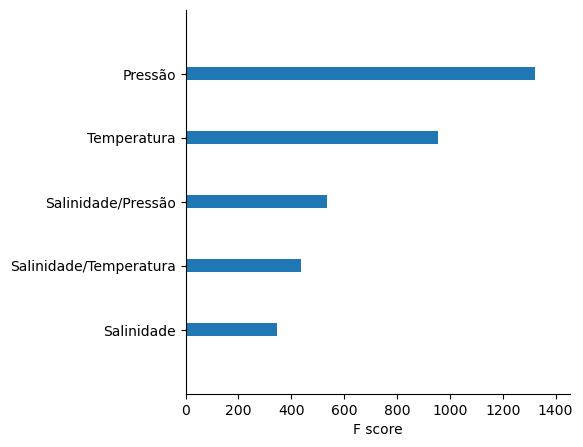

In [22]:
from xgboost import plot_importance

x_treinofi = x_treinorfe.copy()
colunas = ['Temperatura','Pressão','Salinidade','Salinidade/Pressão','Salinidade/Temperatura']
x_treinofi.columns = colunas
xgb_model = XGBRegressor(random_state=10)
xgb_model.fit(x_treinofi, y_treino)

plt.figure(figsize=(20, 6))
plot_importance(xgb_model, importance_type='weight', show_values=False)
plt.ylabel("")
plt.title("")
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1)
ax = plt.gca()
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(r'C:\Users\Graziela Santana\Desktop\TCC\Solubilidade\Features.png')
plt.show()

### MODELAGEM

In [ ]:
# xgboost 

import optuna
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),
        'random_state': 10
    }
    
    model = XGBRegressor(**params)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    rmses = cross_val_score(model, x_treinorfe, y_treino, scoring='neg_root_mean_squared_error', cv=kfold)
    avg_rmse = -np.mean(rmses)
    return avg_rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
print('Valor mínimo médio do RMSE:', study.best_value)
print('Melhores hiperparâmetros:', study.best_params)

In [ ]:
optuna.visualization.plot_contour(study)

### AVALIAÇÃO

In [23]:
xgboost = XGBRegressor(reg_lambda=0.000822,alpha=8*10**-8,subsample=0.50,n_estimators=957, max_depth=4, learning_rate=0.061, objective="reg:squarederror", random_state=10,eval_metric='rmse')
xgboost.fit(x_treinorfe, y_treino)
previsoes_teste = xgboost.predict(x_testerfe)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
print(mean_absolute_error(y_teste, previsoes_teste))
print(np.sqrt(mean_squared_error(y_teste, previsoes_teste)))
print(mean_absolute_percentage_error(y_teste, previsoes_teste))

0.08678083025066478
0.13763958357968223
1428145960334.1023


In [25]:
# avaliação nas faixas de interesse do CCS

teste = x_testerfe.copy()
teste['CO2'] = y_teste

def ccs(teste):
    if teste['Temp'] < 373 and 20 <= teste['Press'] <= 40:
        return 0
    else:
        return 1

teste['ccs'] = teste.apply(ccs, axis=1)
teste['ccs'].value_counts()

1    172
0     24
Name: ccs, dtype: int64

In [26]:
ccs_dados = teste.query('ccs != 1')
x_ccs = ccs_dados.drop(columns=['CO2','ccs'])
y_ccs = ccs_dados['CO2']

In [27]:
previsoes_ccs = xgboost.predict(x_ccs)

print(mean_absolute_error(y_ccs, previsoes_ccs))
print(np.sqrt(mean_squared_error(y_ccs, previsoes_ccs)))
print(mean_absolute_percentage_error(y_ccs, previsoes_ccs))

0.04250477428353283
0.05842668971675187
2.0950408696466774


### EXPORTAÇÃO DOS DADOS DE TESTE PARA COMPARAÇÃO COM OUTROS MODELOS

In [ ]:
teste = x_teste.copy()
teste = teste.drop(columns=['lnp','mp','mt'])
teste['CO2'] = y_teste

In [ ]:
path1 = r"C:\Users\Graziela Santana\Desktop\TCC\Solubilidade\Solubilidade_teste.xlsx"
teste.to_excel(path1,index=False)